## Clustering 

Clustering is an unsupervised approach which finds a structure/pattern in a collection of unlabeled data.  find out similarities and dissimilarities between different objects and then tries to make a group of similar objects. This is called clustering, the method of identifying similar instances and keeping them together. In Other words, clustering identifies homogeneous subgroups among the observations.

### K-Means Clustering Algorithm

<img src="Steps Kmeans.PNG" width= "800">

Let's take 1 random dataset with two input features,as shown below

<img src="Step-3.PNG" width= "700">

<img src="Step-2.PNG" width= "700">
Next to Calculate the distance of all the points from all the K centres and allocate the points to cluster based on the shortest distance
<img src="Step1.PNG" width= "700">
The model’s inertia is the mean squared distance between each instance and its closest centroid. The goal is to have a model with the lowest intertia.Now according to inertia our centroid get shifted, as shown below
<img src="Step-4.PNG" width= "700">
<img src="Step-5.1.PNG" width= "700">
We can see two Blue points placed nearer to red Centroid, hence again distance of each instances from centroid will be calculated, and according to that reassignment will done.As shown below.
<img src="Step-5.PNG" width= "700">
step 4 will get repeated until the locations of the centroids stop changing and the cluster allocation of the points becomes constant.hence at Final step we will be having constant location of cluster as shown below
<img src="Final Result.PNG" width= "700">
Final Result Will be:

<img src="Final Model.PNG" width= "600">
The theory discussed above can be mathematically expressed as:

* Let C1, C2, Ck be the K clusters
* Then we can write: $C_1 U C_2 UC_3 U…UC_k $={1,2,3,…,n} i.e., each datapoint has been assigned to a cluster.
* Also, 
<img src='non_overlapping.PNG' width='300'>
This means that the clusters are non-overlapping.

* The idea behind the K-Means clustering approach is that the within-cluster variation amongst the point should be minimum. The within-cluster variance is denoted by: W(Ck).Hence, according to the statement above, we need to  minimize this variance for all the clusters. Mathematically it can be written as:
<img src='minimize_ck.PNG' width='300'>

* The next step  is to define the criterion for measuring the within-cluster variance. Generally, the criterion is the Euclidean distance between two data points.
<img src='wck_formula.PNG' width='300'>

* The above formula says that we are calculating the distances between all the point in a cluster, then we are repeating it for all the K clusters(That’s why two summation signs) and then we are dividing it by the number of observation in the clusters (Ck is the number of observations in the Kth cluster) to calculate the average.

So, ultimately our goal is to minimize:

<img src='final_ck.PNG' width='300'>


## Python Implementation

## Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [14]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset=dataset.drop(columns=['CustomerID'],axis=1)
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
dataset.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [17]:
#To see Visualisation Of K-Means Algorithm Result we are now dealing with Only Two Features(Annual Income,Spending Score)

X=dataset.iloc[:, 2:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


As we saw earlier, we need to provide the value of K beforehand. But the question is how to get a good value of K. An optimum value of K is obtained using the Elbow Method.

###### The Elbow-Method
​
This method is based on the relationship between the within-cluster sum of squared distances(WCSS Or Inertia) and the number of clusters. It is observed that first with an increase in the number of clusters WCSS decreases steeply and then after a certain number of clusters the drop in WCSS is not that prominent. The point after which the graph between WCSS and the number of clusters becomes comparatively smother is termed as the elbow and the number of cluster at that point are the optimum number of clusters as even after increasing the clusters after that point the variation is not decreasing by much i.e., we have accounted for almost all the dissimilarity in the data. An elbow-curve looks like:
​
<img src='elbow.PNG' width='500'>
​

## Using Elbow Method To Find Optimal no of Cluster(K)

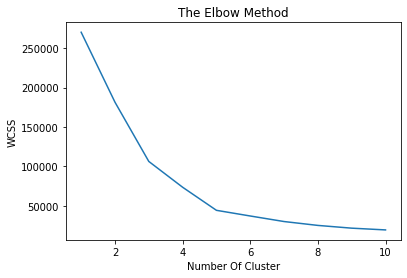

In [22]:
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number Of Cluster')
plt.ylabel('WCSS')
plt.show()

From above Elbow plot, we have got optimum K Value =5

## Training Our K-Means Model On dataset

In [23]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising The Clusters

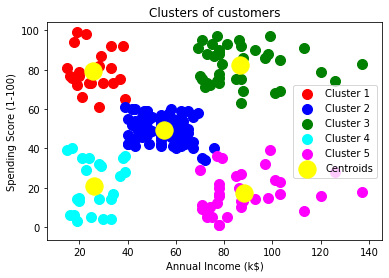

In [27]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()